# Práctica #3
# Modelos de clasificación


- Acosta Imandt Daniel
- Andres Urbano Guillermo Gerardo
- Barón Bárcenas Iván
- Avitua Varela Fernando
- Garduño Martinez Eduardo




## Problema 
Actualmente trabaja para una cadena de Hoteles, le encargan la tarea de construir un
modelo que ayude a predecir si un cliente cancelará una reservación pues esto les ha
traído bastantes problemas, para esto le han proporcionado un conjunto de datos con las
características de las reservaciones y cancelaciones del hotel.

## Objetivo
El objetivo de esa práctica será generar una tabla estructurada y limpia para que en un
futuro se pueda predecir cuando un cliente caerá en mora a partir de sus características
y comportamiento pasado.
Finalmente construya un modelo de clasificación de los vistos en clase para ayudar a
tomar la mejor decisión.


In [1]:
#importamos las librerías clásicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Calidad de los datos

Revisión a detalle de la información para descartar casos
particulares o erróneos, la tabla después de calidad de datos debe ser precisa.

In [2]:
def cross_grafica(df,variable,variable_tgt):
  v_variables_new_by_loan_status = pd.crosstab(df[variable],df[variable_tgt])
  v_variables_new_by_loan_status_index = list(v_variables_new_by_loan_status.index)
  #valores
  malos = list(v_variables_new_by_loan_status.iloc[:,0])  
  buenos = list(v_variables_new_by_loan_status.iloc[:,1])

#Configuraciones de la grafica
  plt.figure(figsize=(16,9))
## Se crean las primeras barras
  plt.bar(v_variables_new_by_loan_status_index, malos, label='0', color = "green")
  
## Se crean las segundas barras y se apilan sobre las primeras
  plt.bar(v_variables_new_by_loan_status_index, buenos, label='1',  bottom=malos,color='red')
  plt.xticks(v_variables_new_by_loan_status_index, v_variables_new_by_loan_status_index) #indice y grupos en este caso es lo mismo (indice el numero de grupos y grupos las etiquetas)
  plt.ylabel("Frecuency")
  plt.xlabel(variable)
  plt.title(variable + '_' + variable_tgt)
  plt.legend()
  # plt.savefig(v_variables_new[i]+".png")
  plt.show()

In [3]:
#leemos nuestra tabla sin cambiarle nada
hb=pd.read_csv('/work/hotel_booking.csv')
hb.head(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.00,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.00,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.00,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.50,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [4]:
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [5]:
hb.drop(['reservation_status'],inplace=True,axis=1)

In [6]:
#vemos el diccionario de los feature
dicdat=pd.read_csv('/work/diccionario_datos P2 hotel booking - features.csv')
dicdat.head(50)

,description,feature,Descripción
0,The datasets contains the booking information ...,hotel,Los conjuntos de datos contienen la informació...
1,Value indicating if the booking was canceled (...,is_canceled,Valor que indica si la reserva fue cancelada (...
2,Number of days that elapsed between the enteri...,lead_time,Número de días transcurridos entre la fecha de...
3,Year of arrival date,arrival_date_year,Año de la fecha de llegada
4,Month of arrival date with 12 categories: “Jan...,arrival_date_month,Mes de la fecha de llegada con 12 categorías: ...
5,Week number of the arrival date,arrival_date_week_number,Número de semana de la fecha de llegada
6,Day of the month of the arrival date,arrival_date_day_of_month,Día del mes de la fecha de llegada
7,Number of weekend nights (Saturday or Sunday) ...,stays_in_weekend_nights,Número de noches de fin de semana (sábado o do...
8,Number of week nights (Monday to Friday) the g...,stays_in_week_nights,Número de noches de la semana (de lunes a vier...
9,Number of adults,adults,Número de Adultos


In [7]:
#vemos los valores no nulos de cada columna
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Al ver nuestras tablas vemos que no hay muchos datos faltantes, en donde mas se encuentran es en 'company'y 'agent', los cuales no nos sirven mucho para nuestros análisis por lo que las vamos a borrar.

In [8]:
#Se crea una función para verificar la completitud de las variables de la base.
def completitud(df):
    comple=pd.DataFrame(df.isnull().sum())
    comple.reset_index(inplace=True)
    comple=comple.rename(columns={"index":"columna",0:"total"})
    comple["completitud"]=(1-comple["total"]/df.shape[0])*100
    comple=comple.sort_values(by="completitud",ascending=True)
    comple.reset_index(drop=True,inplace=True)
    return comple

In [9]:
completitud(hb)

,columna,total,completitud
0,company,112593,5.693107
1,agent,16340,86.313762
2,country,488,99.591256
3,children,4,99.996650
4,hotel,0,100.000000
5,assigned_room_type,0,100.000000
6,booking_changes,0,100.000000
7,deposit_type,0,100.000000
8,days_in_waiting_list,0,100.000000
9,customer_type,0,100.000000


In [10]:
# borramos las dos columnas con mas valores faltantes
hb = hb.drop(['company','agent'], axis=1)
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


LLenamos los datos faltantes de  'Children' con la moda de sus columnas y eliminamos los renglones de los datos faltantes que quedan.

In [11]:
hb['children'] = hb['children'].fillna(hb['children'].mode()[0])

In [12]:
#una vez que ya nos decicimos o llenamos las columnas con más faltantes borramos todas las columnas que tengan algun faltnate y reinicimos nuestros indices
hb=hb.dropna().reset_index(drop=True)
hb.shape

(118902, 33)

In [13]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


Notamos que hay columans que nos nos sirven de nada ya que no reflejan nada del segmento de cliente como es  su número de telefono o su nombre,por lo que las borramos


In [14]:
hb = hb.drop(['credit_card','phone-number','email','name'], axis=1)
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-03


Juntamos las columnas de la fecha de llegada en una sola y las convertimos a formato de tiempo

In [15]:

hb['arrival_date_month'] = pd.to_datetime(hb.arrival_date_month, format='%B').dt.month
hb['fecha']=hb.apply(lambda row:  str(row.arrival_date_year)  + '-' +  str(row.arrival_date_month) + '-' + str(row.arrival_date_day_of_month)  , axis=1)
hb['fecha']=pd.to_datetime(hb['fecha'])
hb['reservation_status_date']=pd.to_datetime(hb['reservation_status_date'])

In [16]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,fecha
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-03,2015-07-01


In [17]:
#Vemos si hay columnas con valores unicos
for j in hb.columns:
    x = pd.unique(hb[j])
    if len(x) == 0:
        print(j)

In [18]:
#Creamos una columna que nos diga la diferencia de dias entre el dia de llegada y el dia en que se hizo la reservación
hb['Tiempo Reserva-Llegada'] = hb['reservation_status_date'] - hb['fecha']
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,fecha,Tiempo Reserva-Llegada
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0 days
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0 days
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,2015-07-01,1 days
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,2015-07-01,1 days
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,2015-07-03,2015-07-01,2 days


## Normalización de variables



## Ánalisis exploratorio

Dentro del PDF agregar aquellas visualizaciones o an ánalisis
que muestren un comportamiento particular o de importancia para el objetivo, las
Las visualizaciones deben estar acompañadas de una breve descripción.

Queremos ver del total de reservaciones las que si se cumplieron(0) y las que fueron canceladas(1)

<AxesSubplot:>

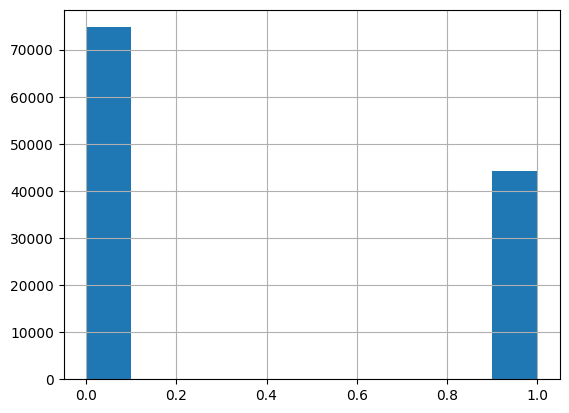

In [19]:

hb['is_canceled'].hist()

Ahora queremos ver muchos histogramas diferentes en donde vemos la fvariables como el número de adultos o el tipo de cliente y vemnos su frecuencia, esto se hace para las reservaciones canceladas y las que no.

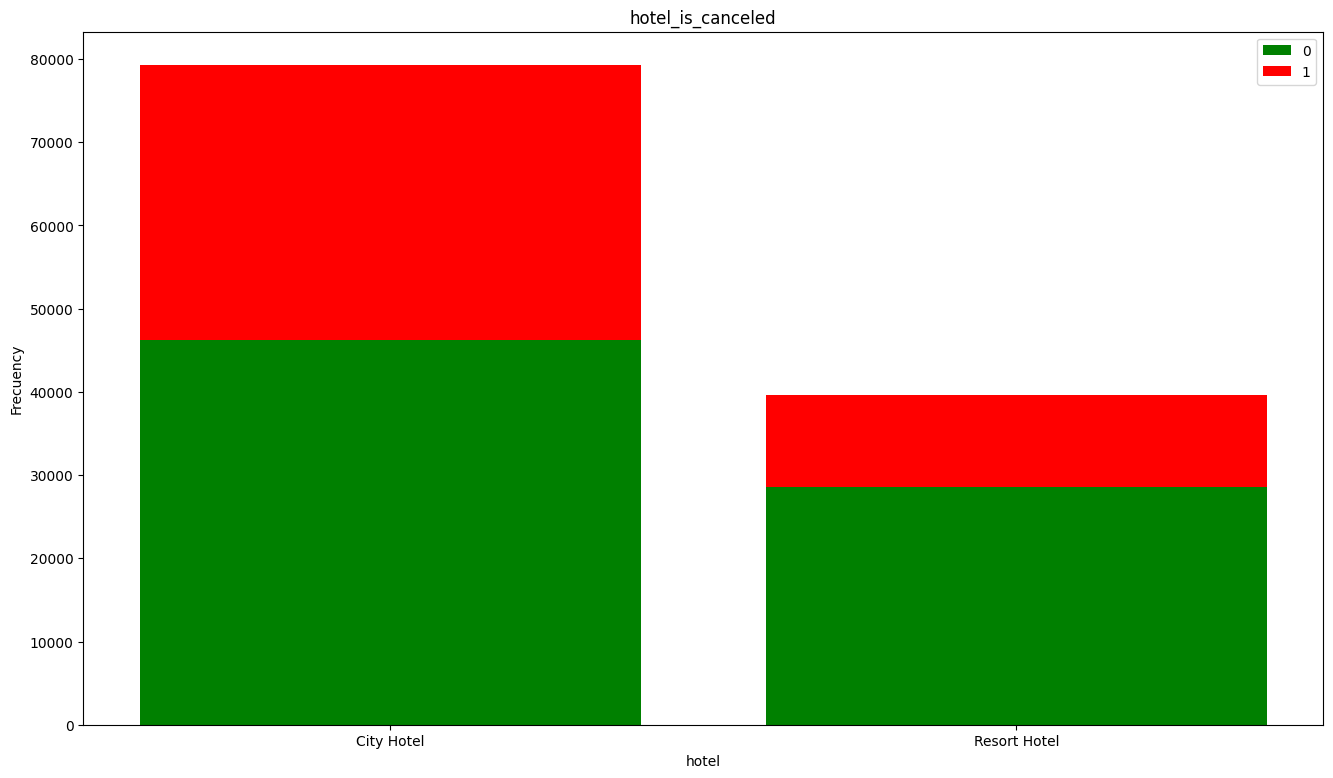

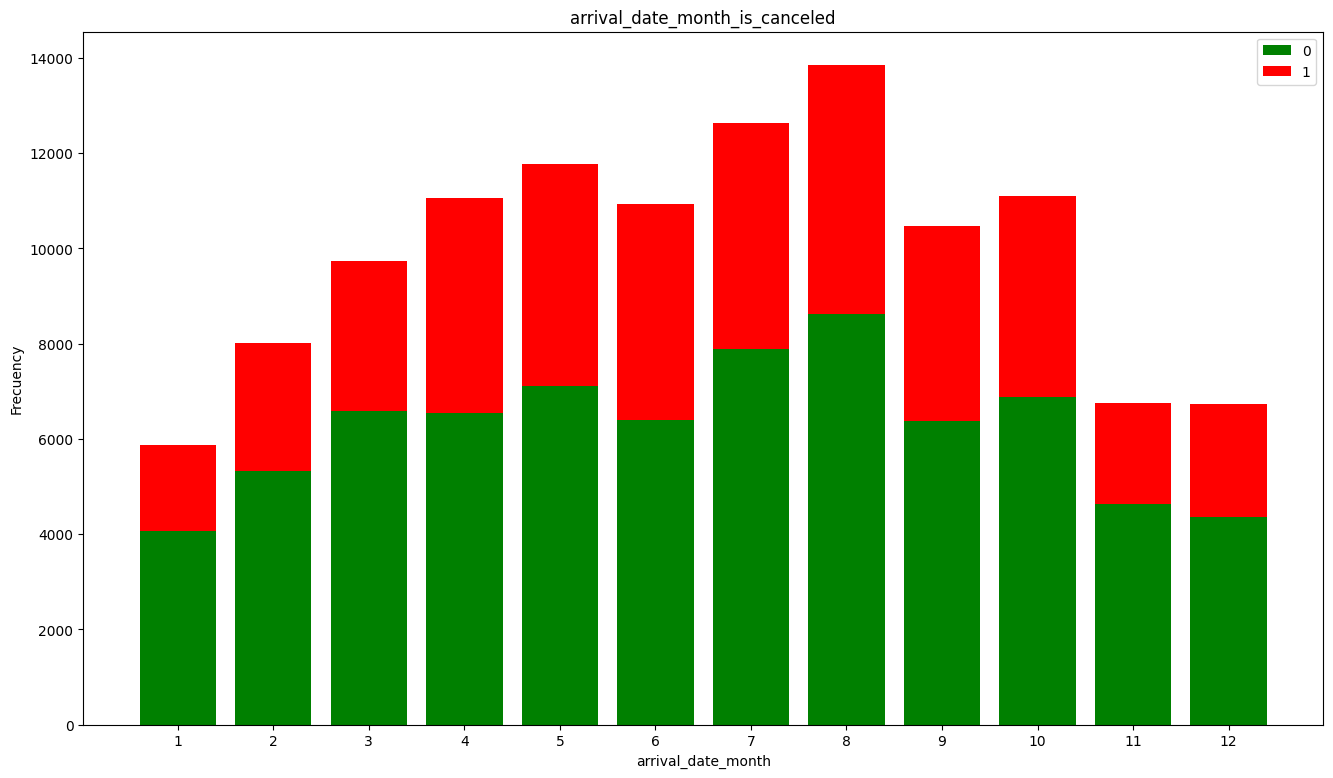

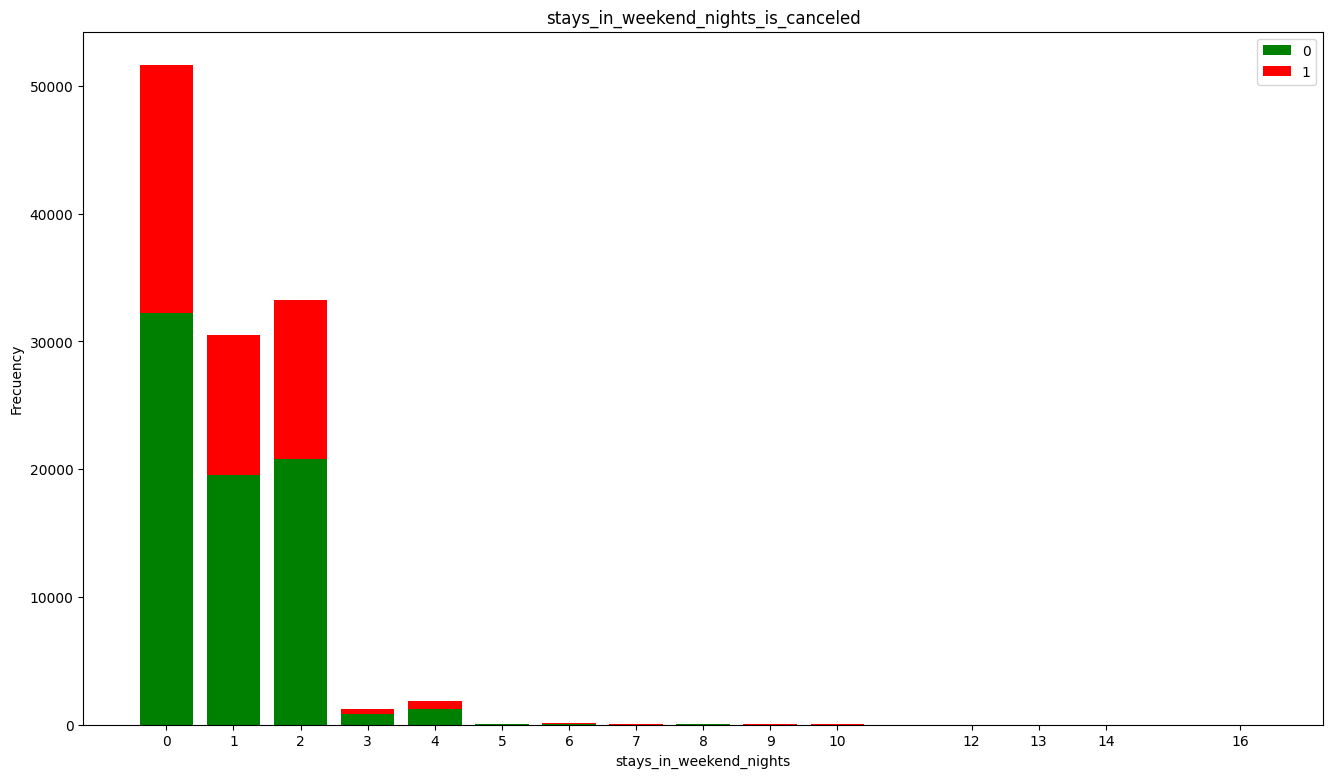

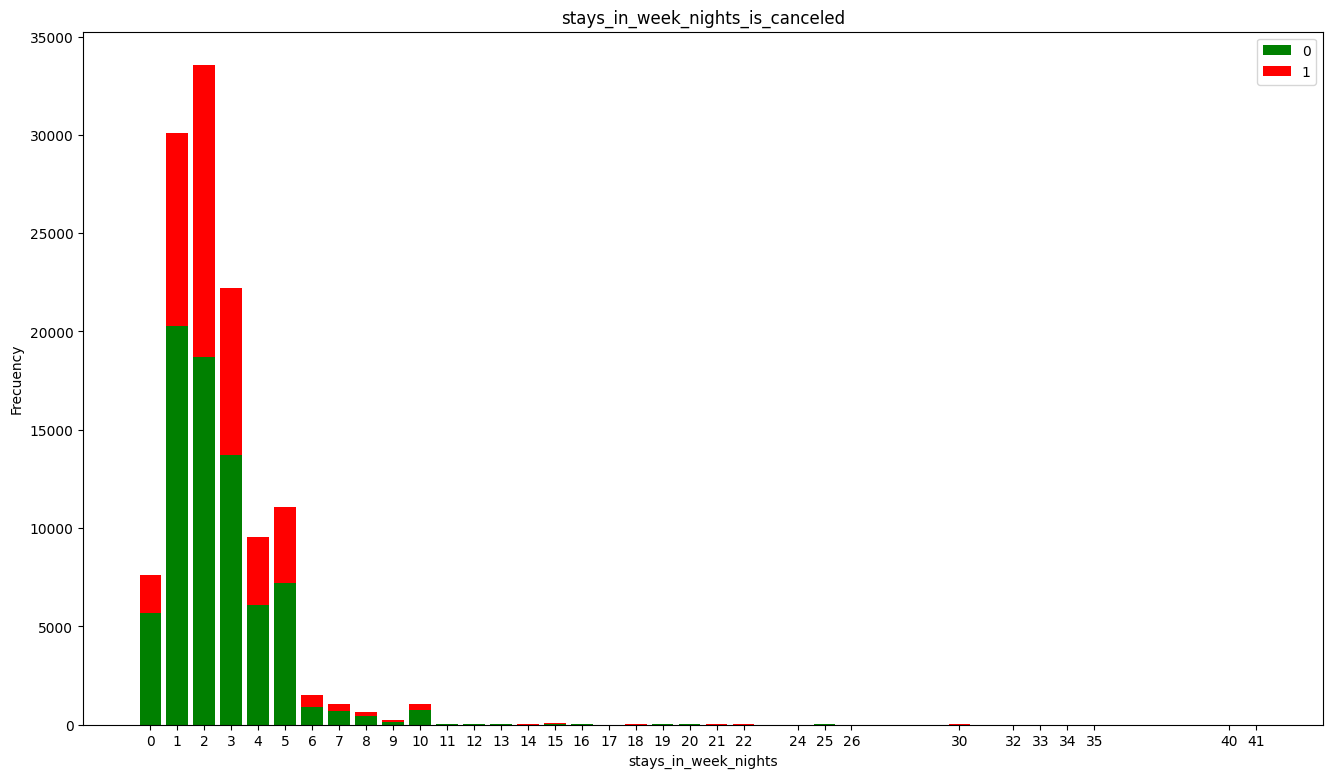

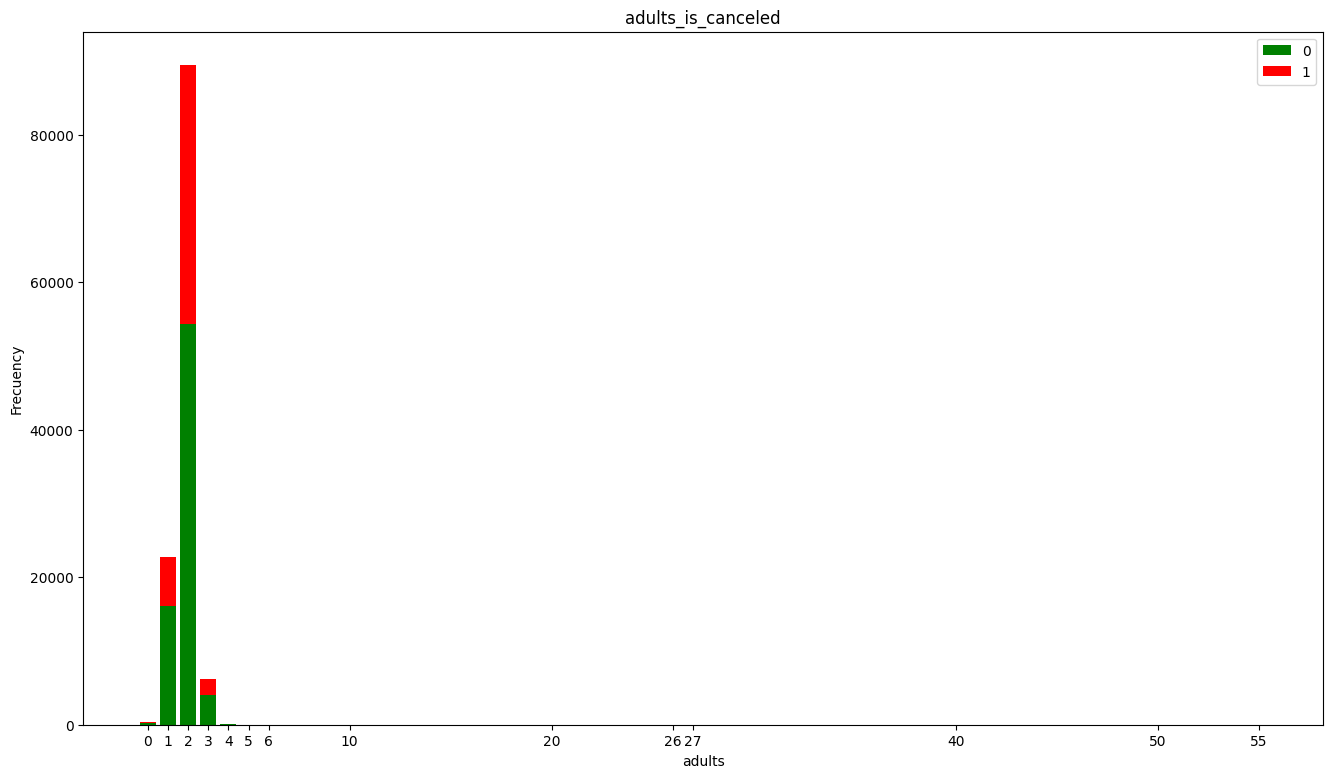

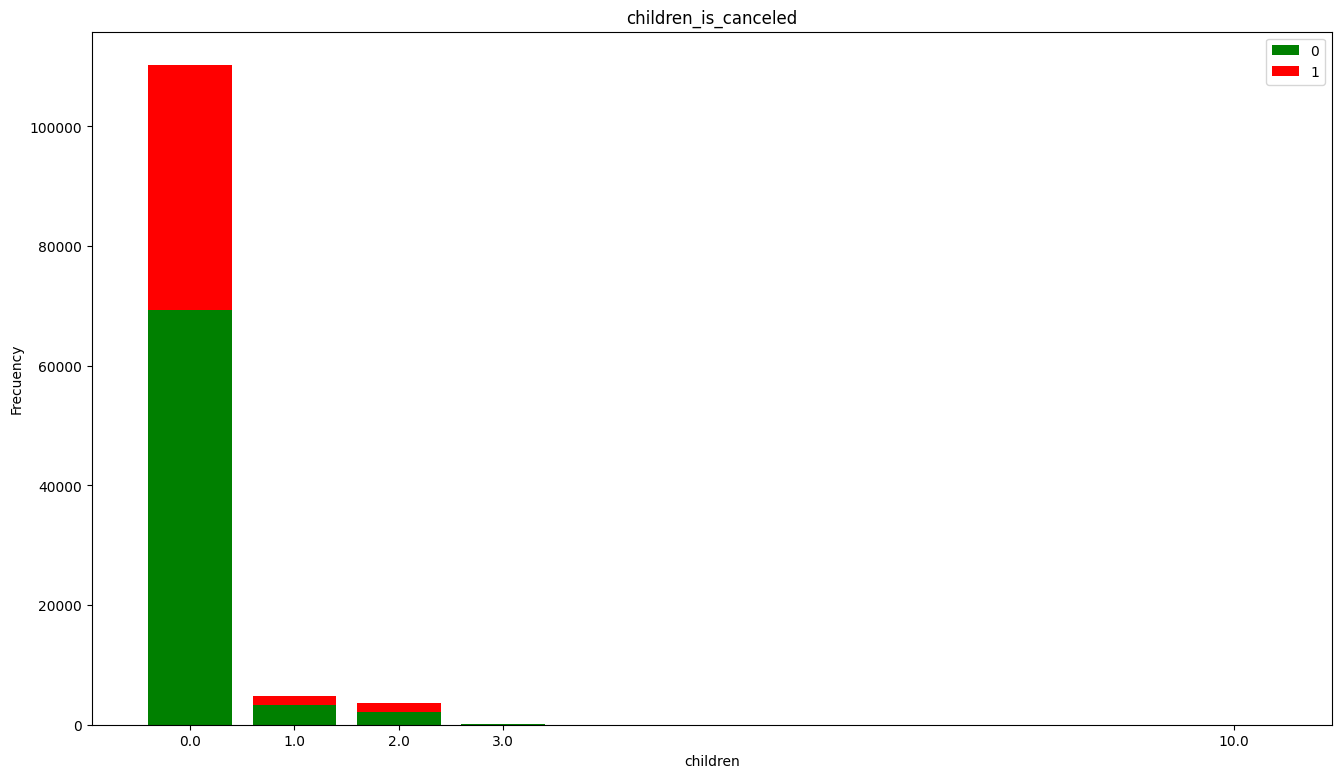

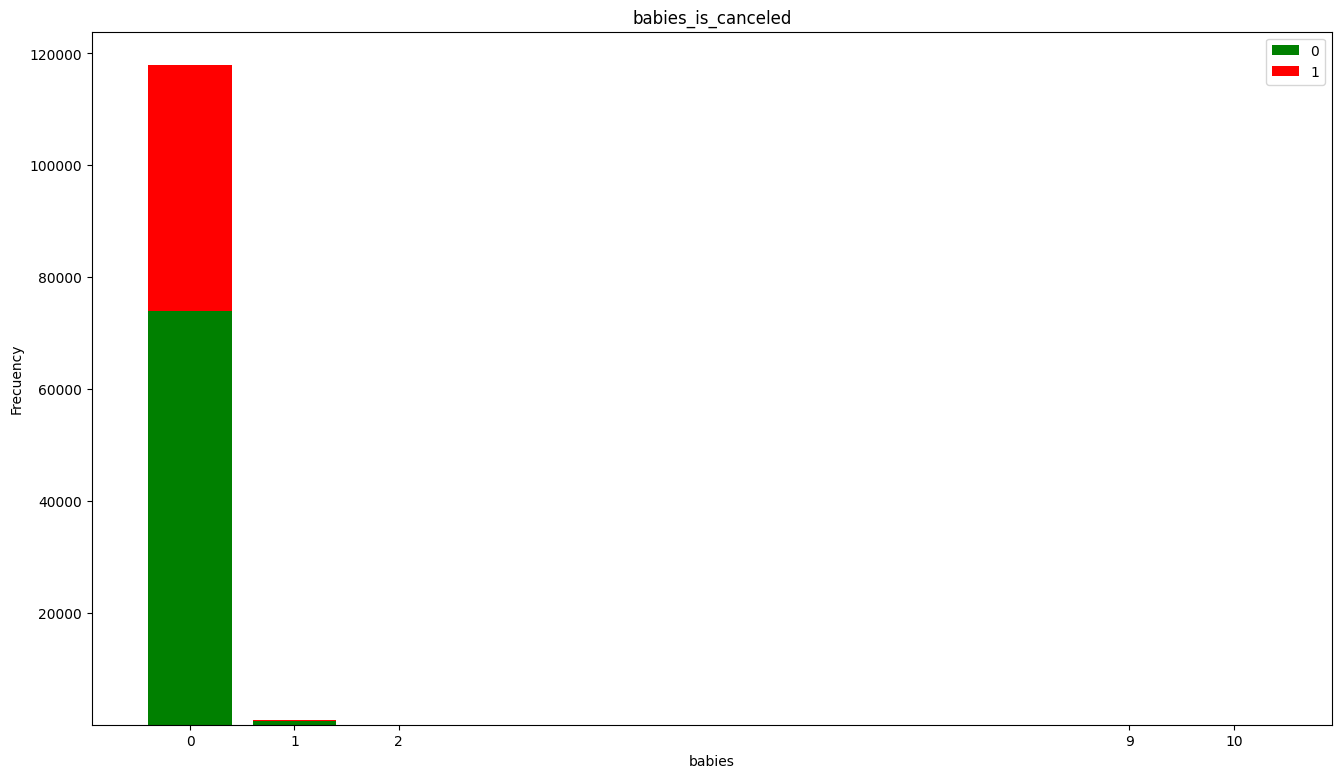

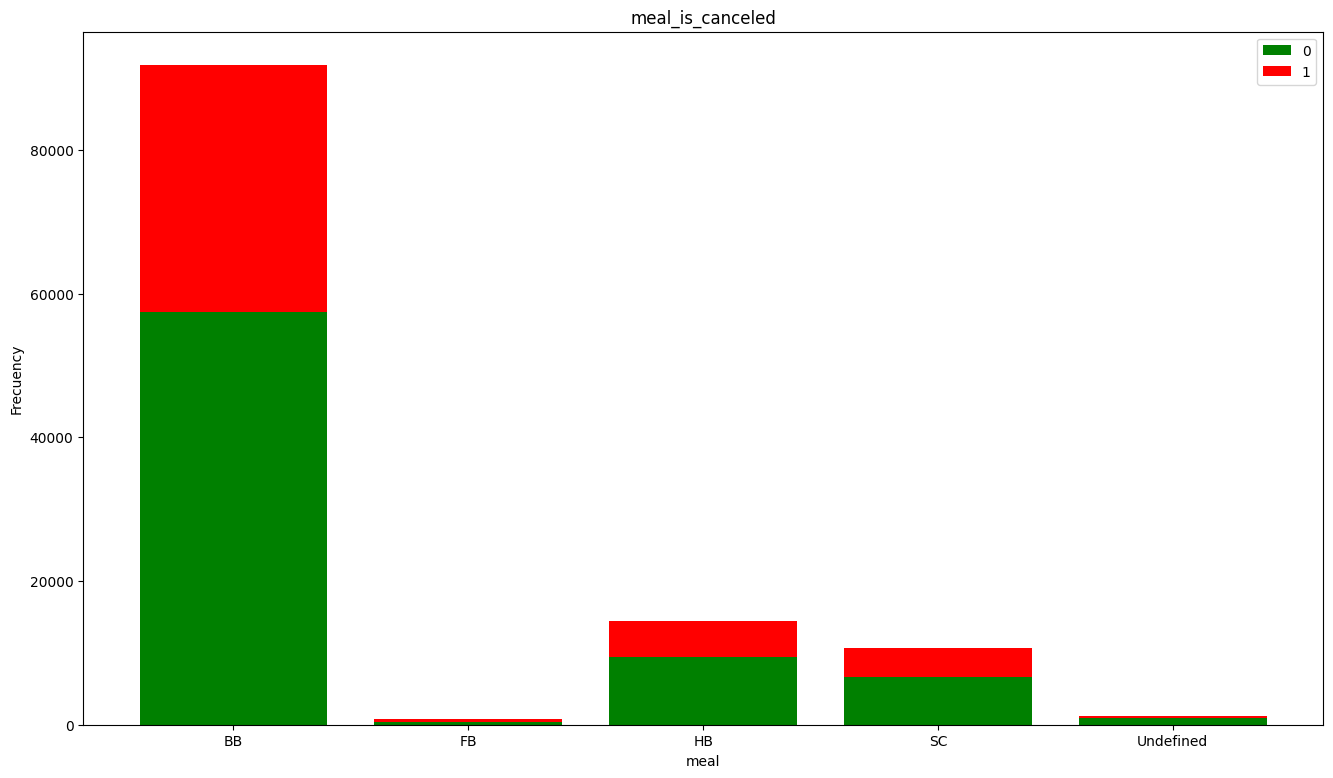

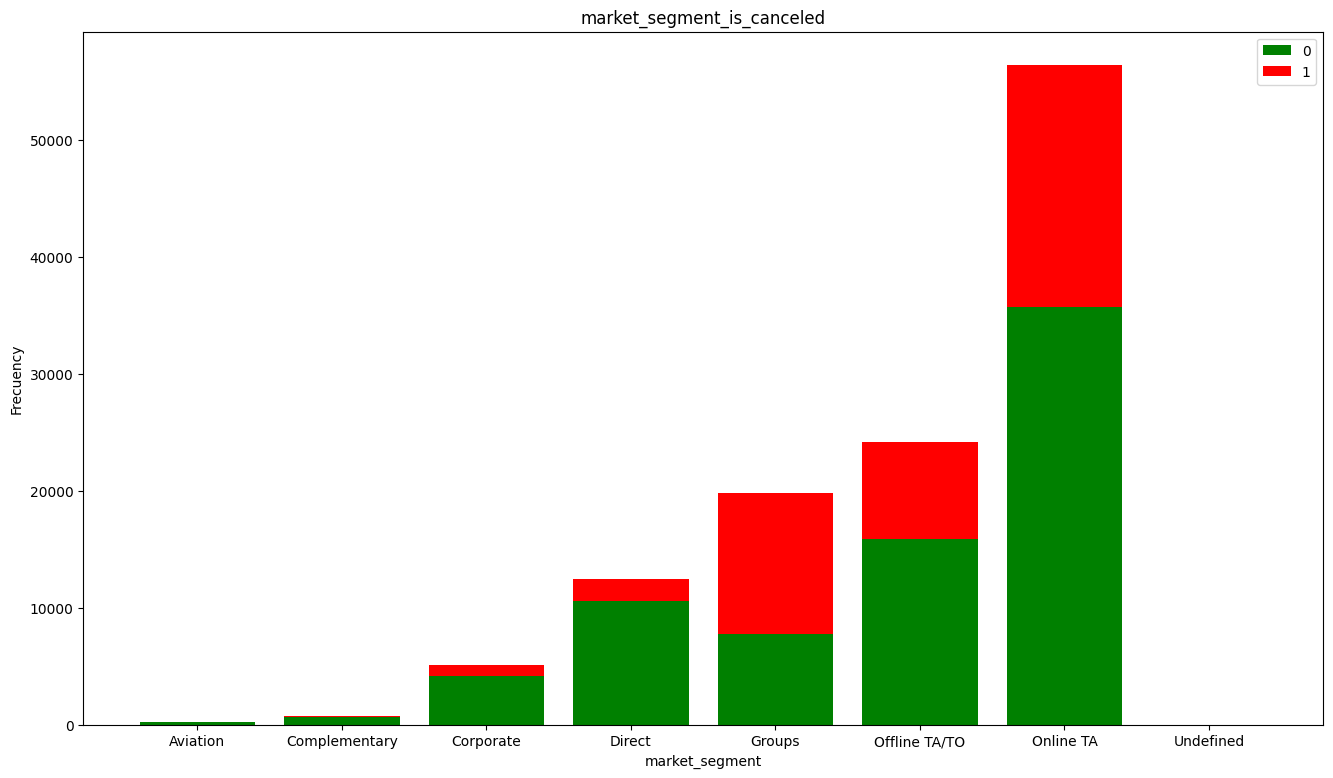

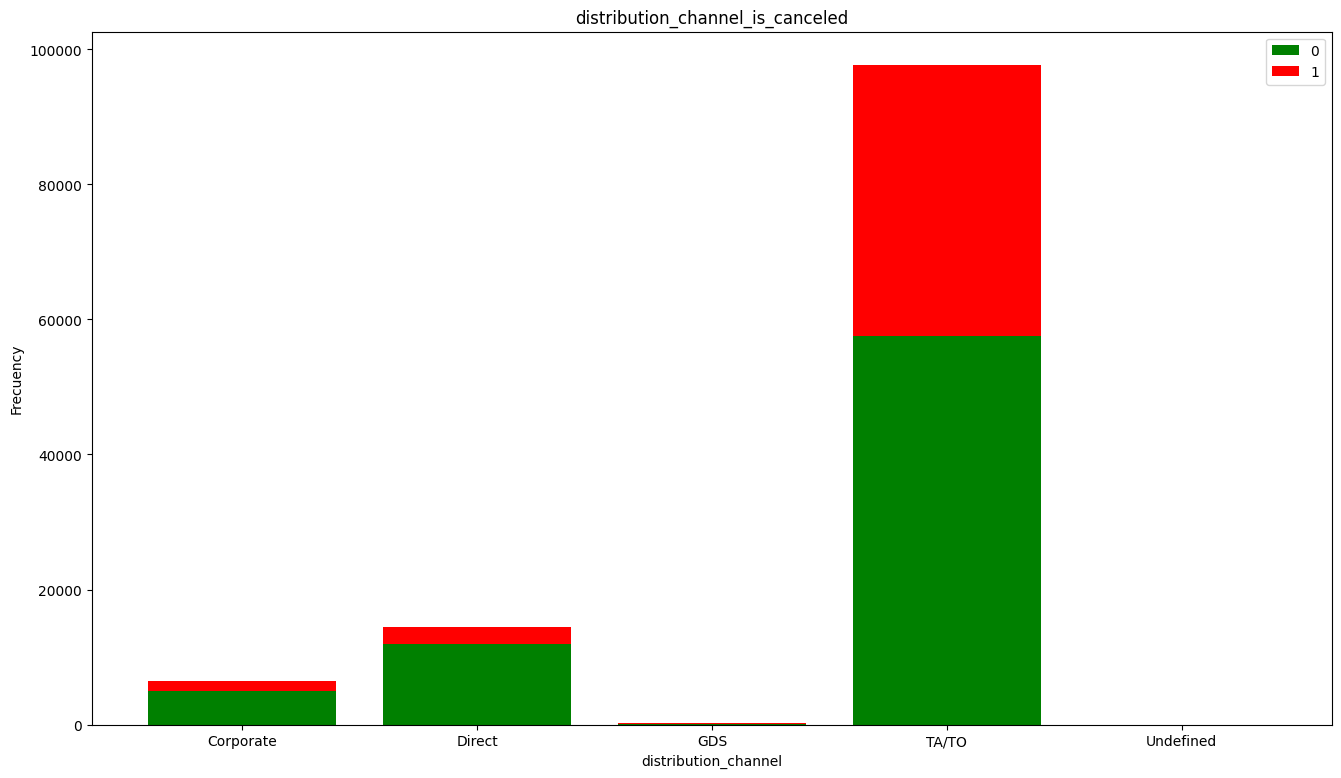

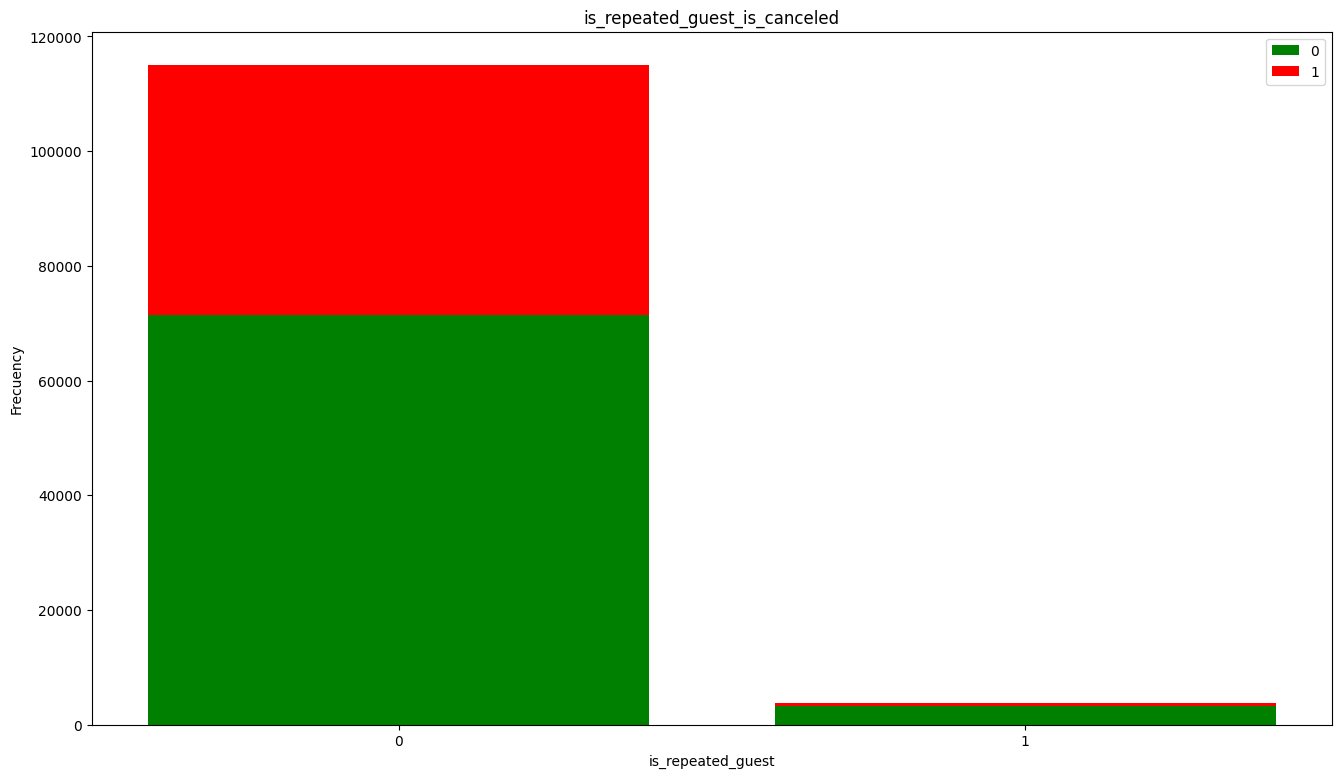

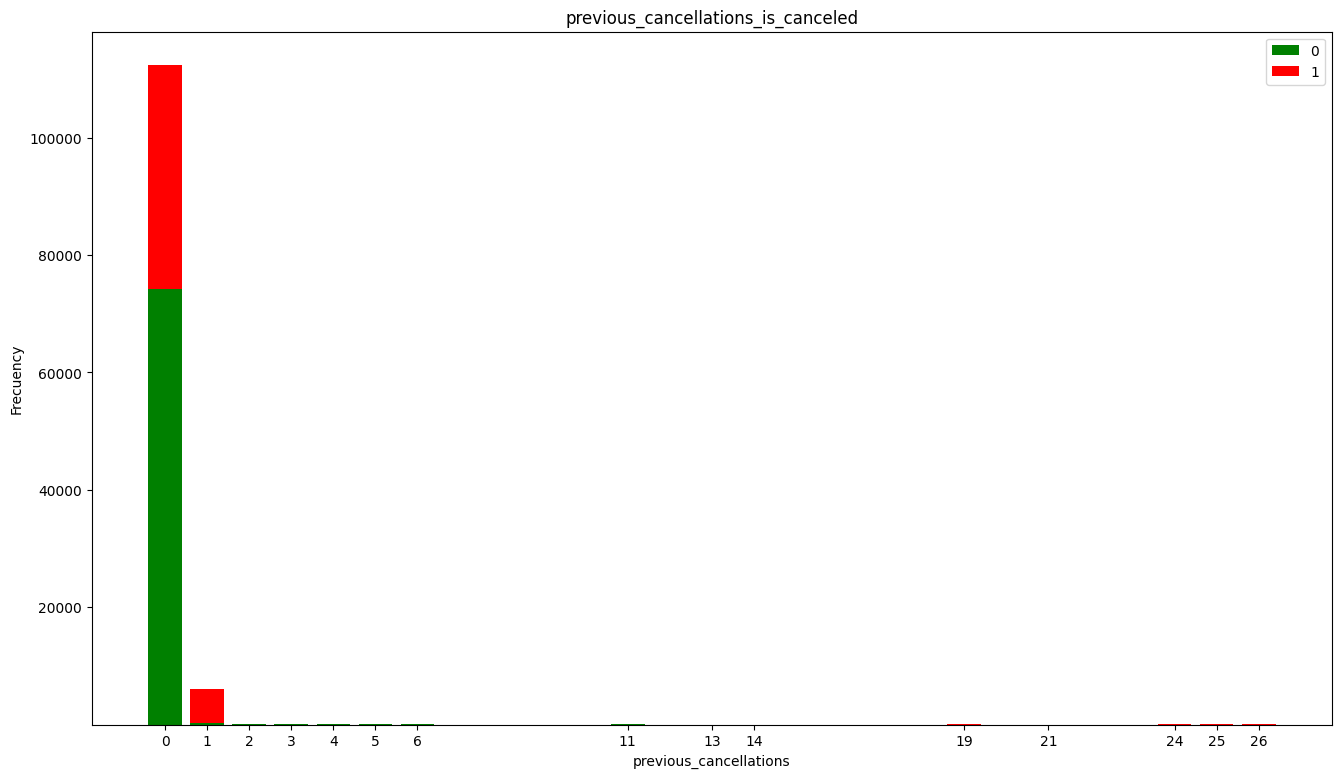

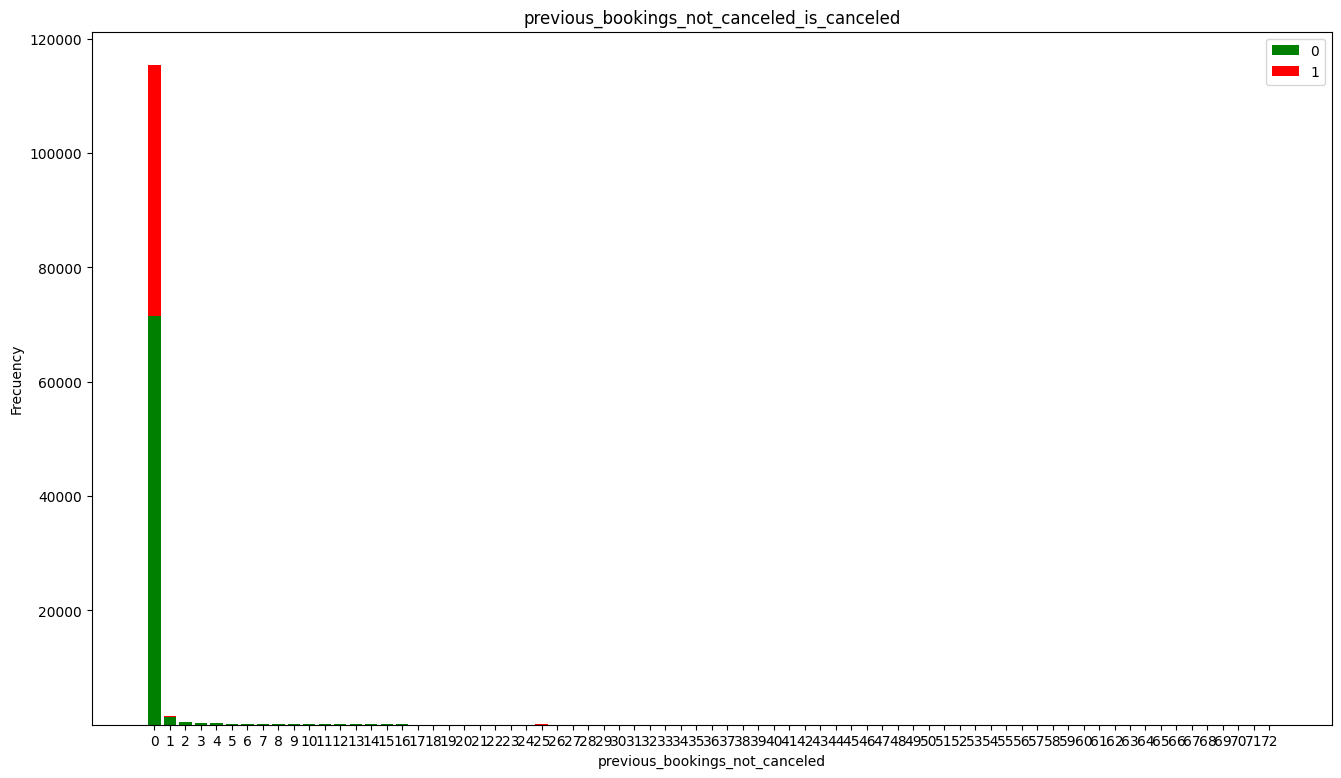

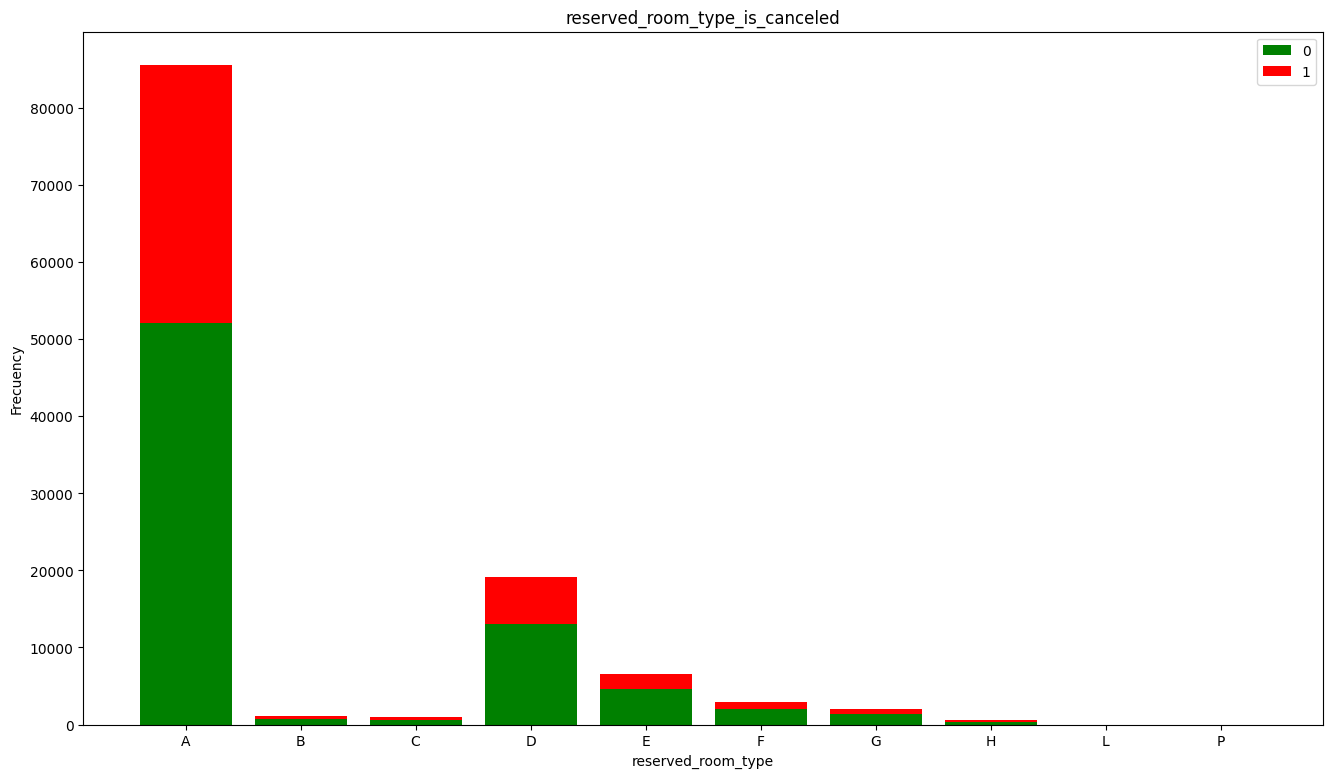

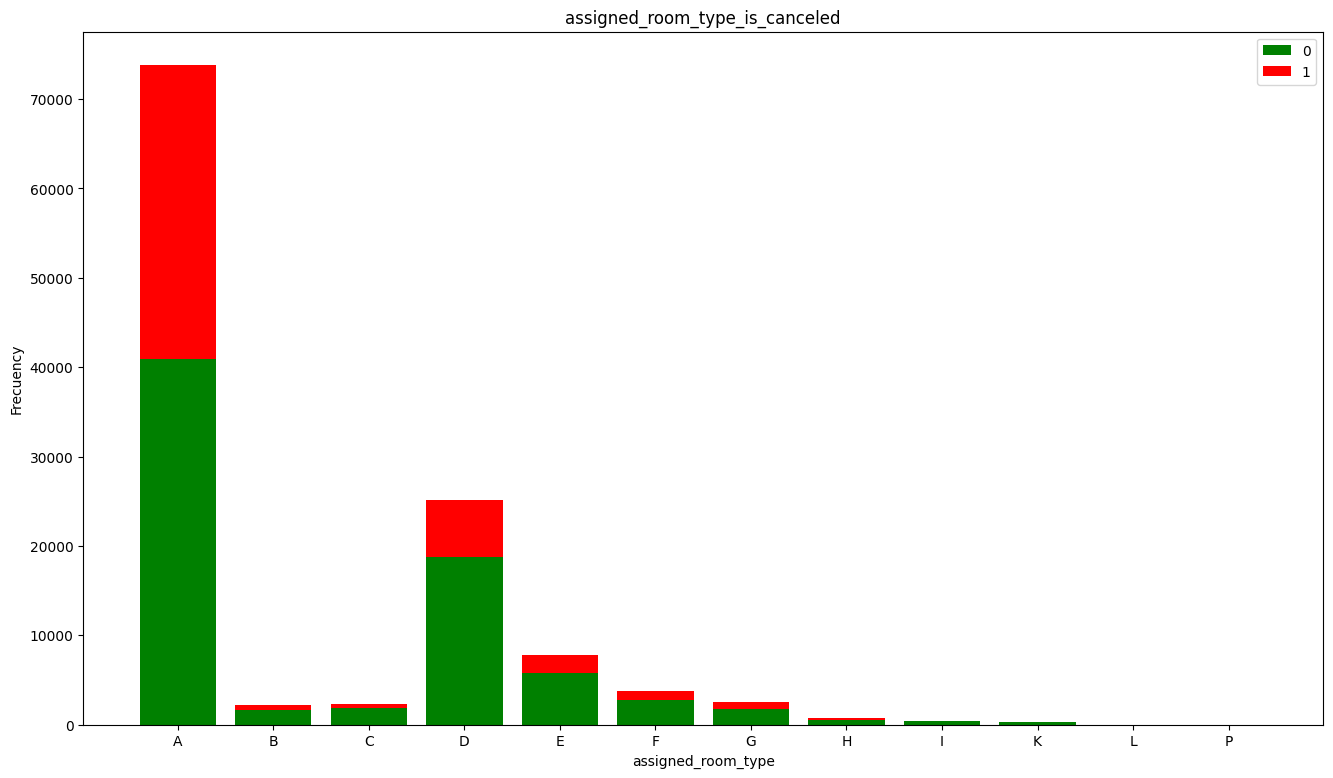

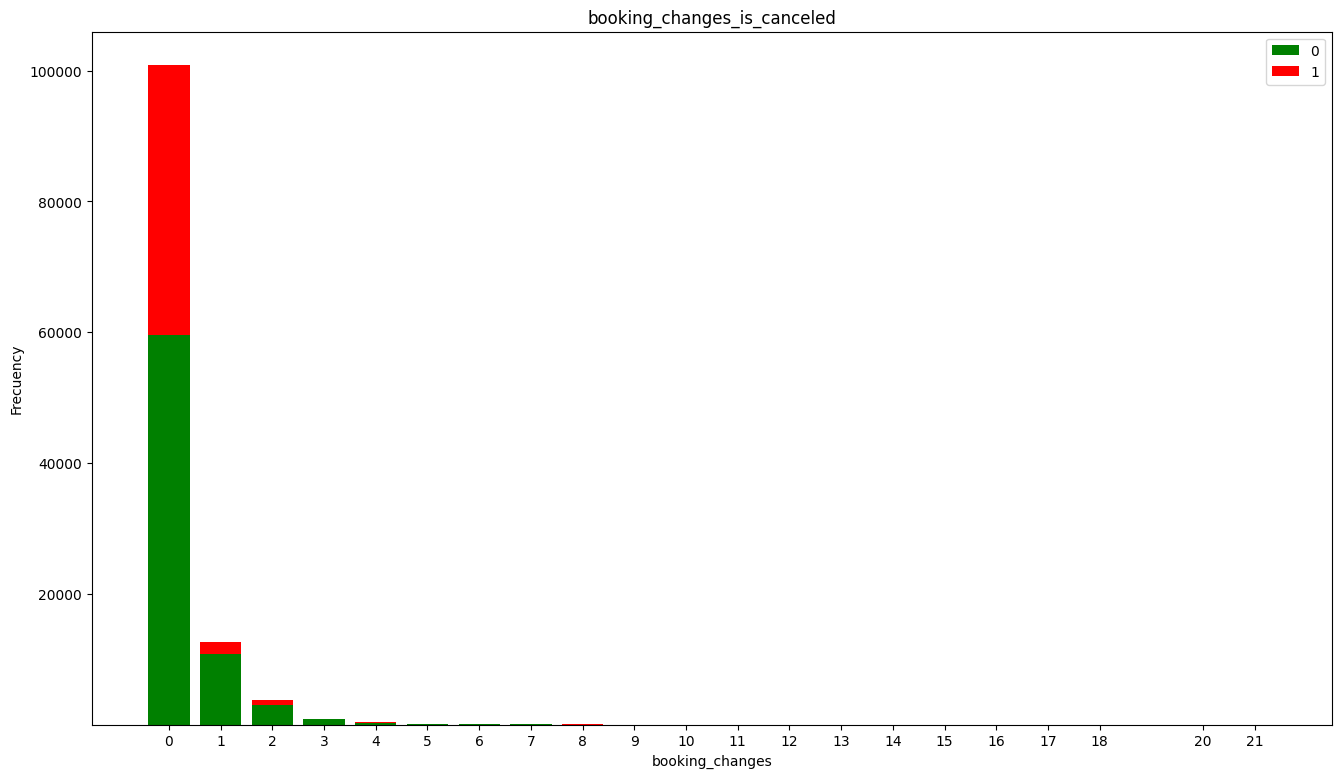

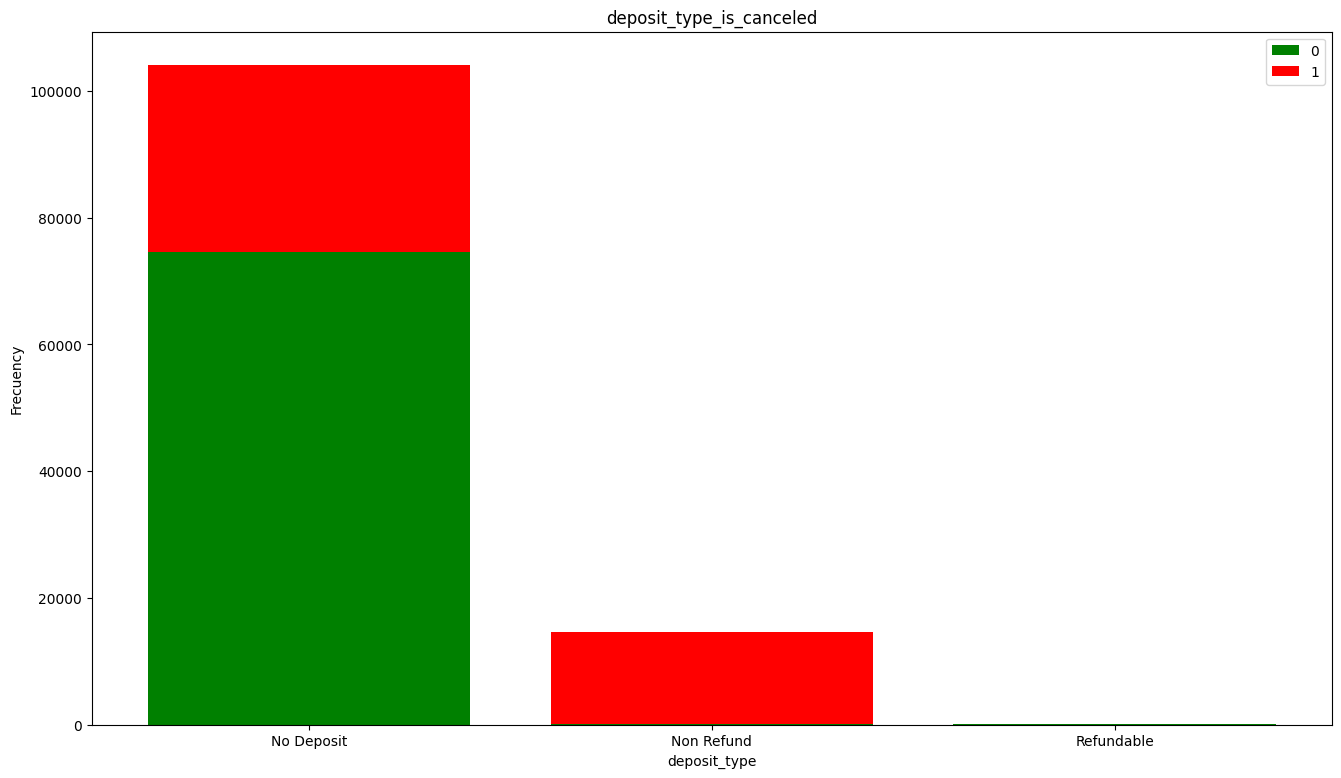

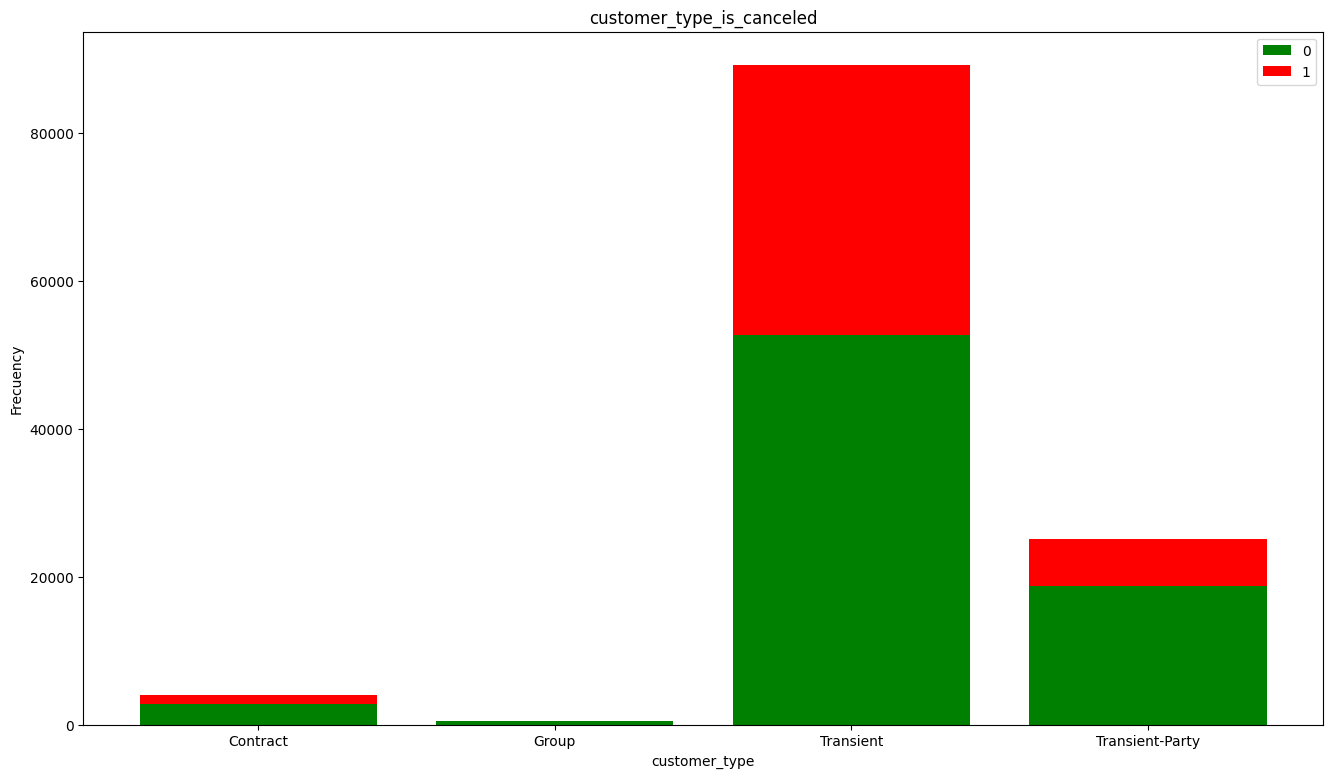

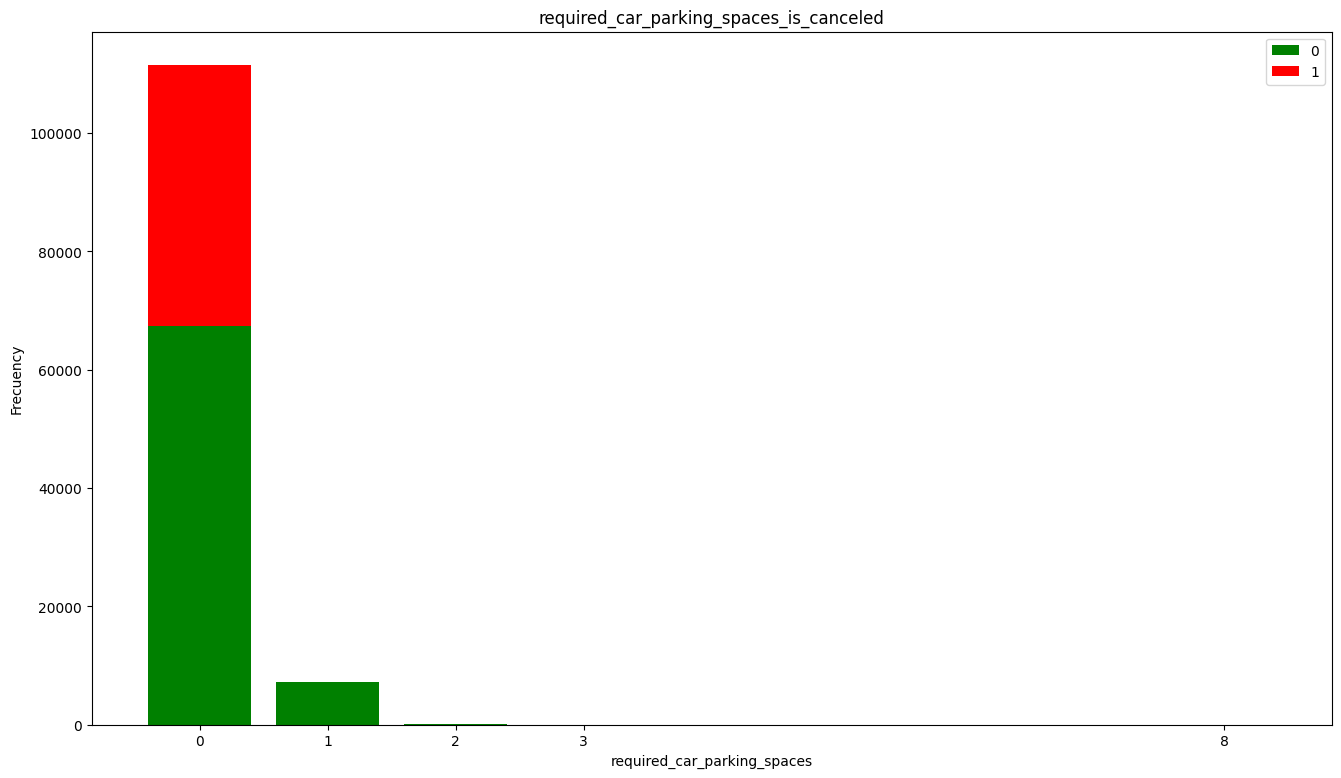

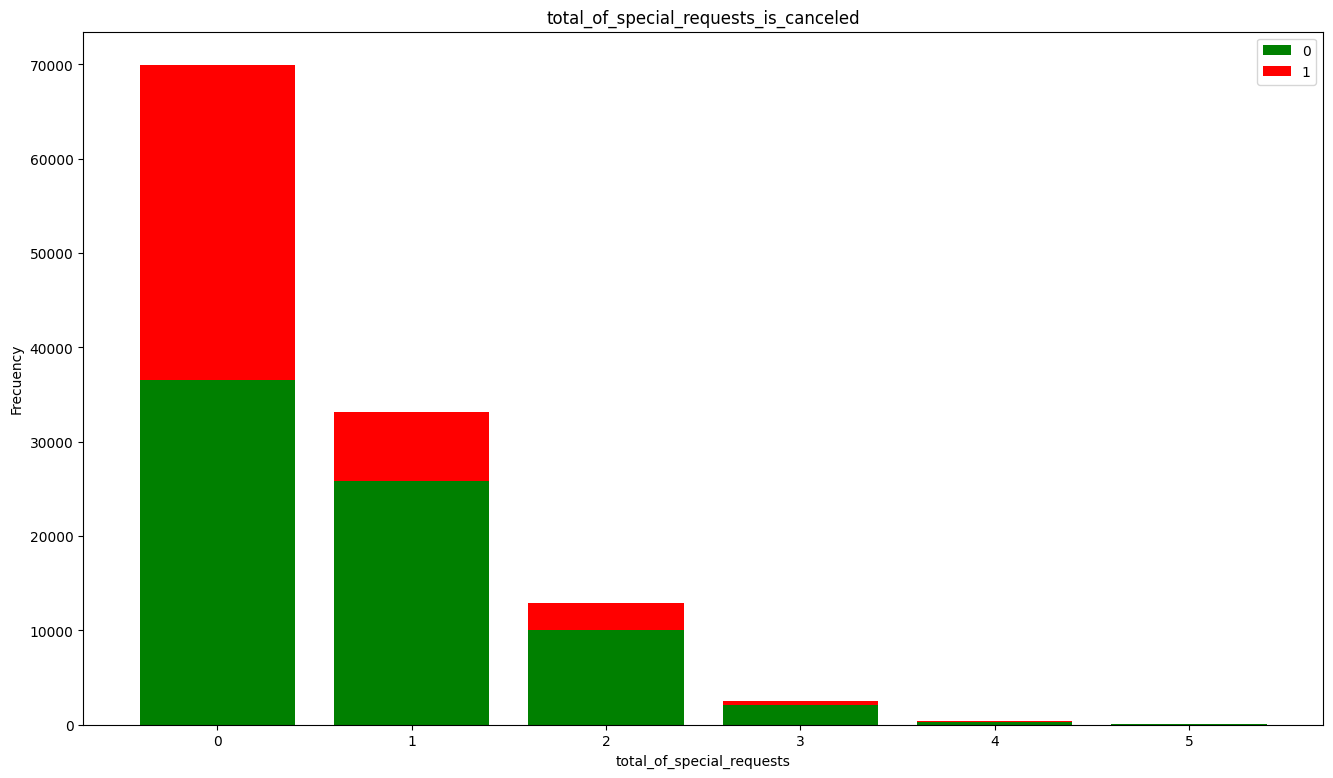

In [20]:

variables = ['hotel',
       'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests']
for j in variables:
    cross_grafica(hb,j,'is_canceled')

De la gráfica de *hotel_is_canceled* podemos ver que en proporción el *resort hotel* posee menos cancelaciones que *city hotel*.
De la gráfica de arrival_date_moth podemos ver que los meses en los que más se hacen reservas son de los de mitad de año, además parece que estos meses posee una mayor proporción de cancelaciones.
De la gráfica de *stay in weekend nights* podemos ver que los usuarios suelen quedarse solo un fin de semana, ya que se puede observar que se quedan uno o dos días.
De la gráfica de *stay in week nights* podemos ver que la gente suele quedarse uno, dos o tres días, además que este número de días hay más personas que cancelan sus reservas en proporción que los demás días.
De la gráfica de *adults* se puede observar que la cantidad de adultos se concentra en 1,2,3 adultos.
De la gráfica de *children* podemos ver que en la gran mayoría de los casos no hay niños en las reservas.
De la gráfica de *babies* al igual que el caso anterior, la mayoría de los casos no hay bebés.
De la gráfica de *meal* la mayoría de familias decidían optar por reservación y desayunos, en algunos casos también se añadían las cenas.
De la gráfica de *market segment* podemos ver que hay distintos grupos de donde *Groups*, *Online TA* y *Offline Ta* tienen en proporción mayor cantidad de cancelaciones.
De la gráfica de *distribution* podemos ver que *TA/TO* posee mayor proporción de cancelaciones que los otros grupos.
De la gráfica de *repeate guest* podemos ver que la mayoría de los casos los huéspedes van por primera vez al hotel.
De la gráfica de *previous cancel* podemos ver que la mayoría de personas no había cancelado antes, esto sé congruente, ya que la mayoría de huéspedes iban por primera vez al hotel, también podemos observar que las personas que habían cancelado una vez en una ocasión anterior tienden a cancelar de nuevo.
De la gráfica de *reserved room* podemos ver que la mayoría de familias se inclinaban por las habitaciones de tipo *A*,*D* y *E*, además que las personas que reservaban en la habitación de tipo *A* son más propensos a cancelar
De la gráfica de *deposite type* podemos ver que la mayoría no poseía un reembolso 
De la gráfica de *custumer type* podemos ver que la mayoría son de tipos *transient o transient-party*, además que de *transient* hay mayor proporción de cancelaciones.
De la gráfica de *required car parking* podemos ver que la mayoría de familias No necesitaban carro y otras 
solo necesitaban 1, además que se ve que las familias que no llevaban carro tienden a cancelar.
De la gráfica de *total special request* podemos ver que la mayoría de personas realizaban un máximo de 2 peticiones especiales, además de que las personas que no realizaban peticiones de este tipo tendían a cancelar más.

## Outliers

Agregar visualizaciones dentro del PDF pre eliminación de valores atípicos y
post eliminación de valores atípicos, además de agregar que porcentaje se ha eliminado y
que métodos se utilizaron.

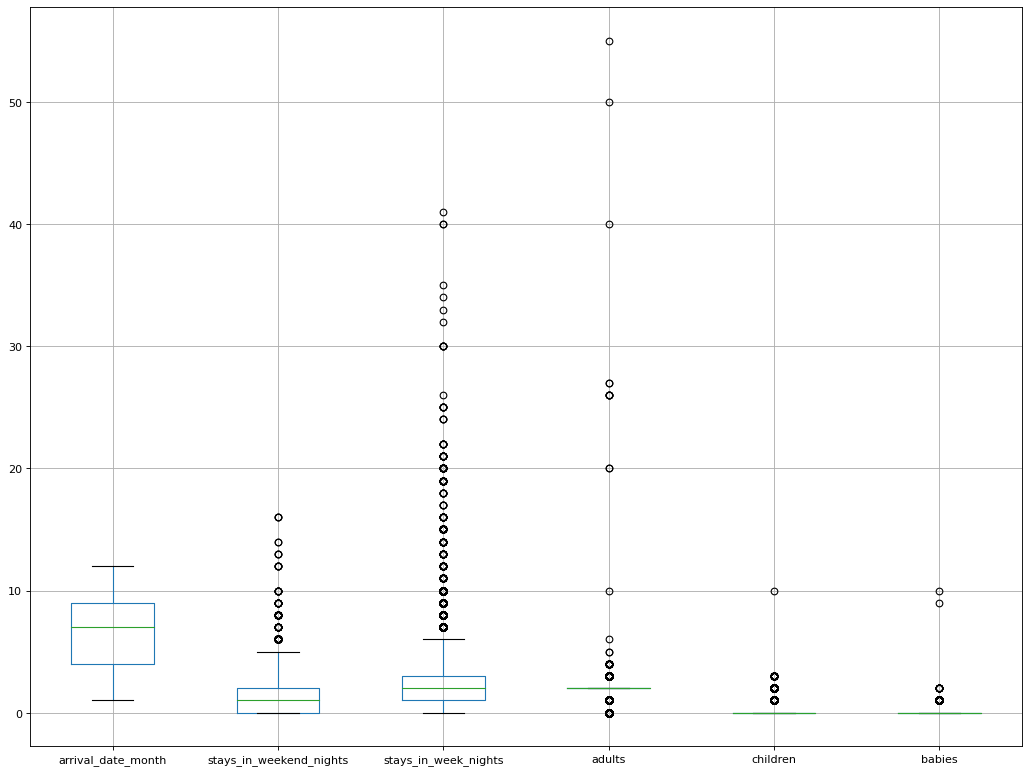

In [21]:
from matplotlib.pyplot import figure

figure(figsize=(16, 12), dpi=80)
variables2 = [
       'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies']

variables3=       [ 'previous_cancellations',
       'previous_bookings_not_canceled', 
        'booking_changes', 
       'required_car_parking_spaces', 'total_of_special_requests']
boxplot = hb.boxplot(column=variables2)  
  

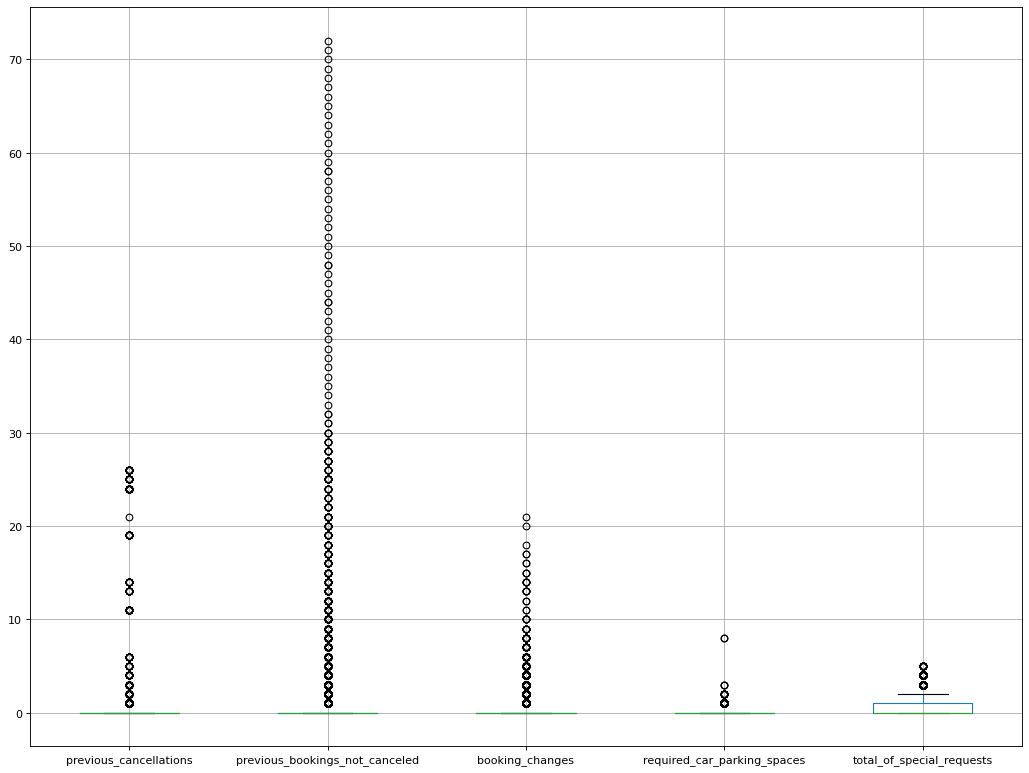

In [22]:
figure(figsize=(16, 12), dpi=80)
boxplot = hb.boxplot(column=variables3)

Notamos que hay demasiados valores atípicos en casi todas las columnas, ya que en muchos casos mas del 75% de los datos son cero como es el caso de 'previous_bookings_not_canceled','Children' y 'Babies'.
Pero al mismo tiempo estos outliers nos pueden dar información importante para saber si cancelara o no, por lo que nos vamos a quedar con los outliers a partir de cierto umbral y los que sean mayor a estos los vamos a suplantar  por  el valor de este umbral,esto nos sirve para poder adjuntar justo los clientes que hacen cosas atipicas y estos son importantes ya que notamos que estos justo son los que más cancelan.
Por lo que ahora tenemos la mimsa cantidad de outliers para poder hacer las clasificaciones pero juntados de una mejor forma para poder sacar patrones interesantes.

In [23]:
for i in range(len(hb['stays_in_weekend_nights'])):
    if  hb['stays_in_weekend_nights'][i] > 5:
        hb['stays_in_weekend_nights'][i] =5


for i in range(len(hb['stays_in_week_nights'])):
    if  hb['stays_in_week_nights'][i] > 7:
        hb['stays_in_week_nights'][i] =7

for i in range(len(hb['adults'])):
    if  hb['adults'][i] > 4:
        hb['adults'][i] =4

for i in range(len(hb['children'])):
    if  hb['children'][i] > 4:
        hb['children'][i] =4

for i in range(len(hb['babies'])):
    if  hb['babies'][i] > 3:
        hb['babies'][i] =3

for i in range(len(hb['previous_cancellations'])):
    if  hb['previous_cancellations'][i] > 10:
        hb['previous_cancellations'][i] =10

for i in range(len(hb['previous_bookings_not_canceled'])):
    if  hb['previous_bookings_not_canceled'][i] > 10:
        hb['previous_bookings_not_canceled'][i] =10

for i in range(len(hb['booking_changes'])):
    if  hb['booking_changes'][i] > 7:
        hb['booking_changes'][i] =7

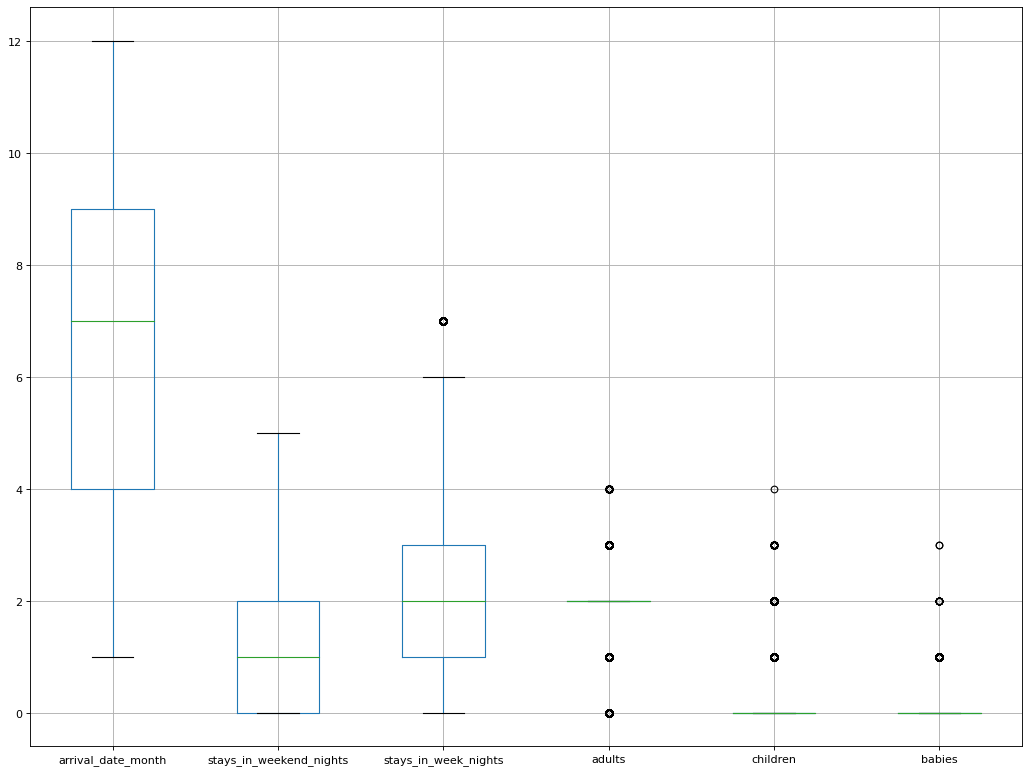

In [24]:
figure(figsize=(16, 12), dpi=80)
boxplot = hb.boxplot(column=variables2)  
  

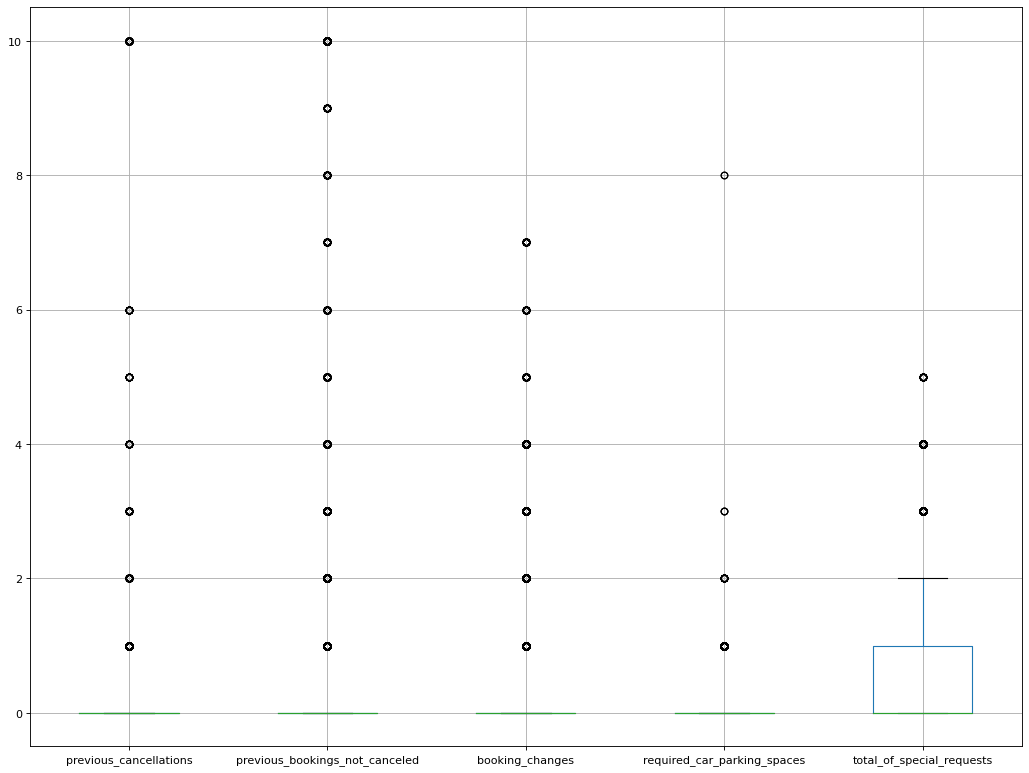

In [25]:
figure(figsize=(16, 12), dpi=80)
boxplot = hb.boxplot(column=variables3)

Al ver las nuevas gráficas de cajas notamos que en efecto ahora los outliers estan mas cerca entre si y esto no afecta a los valores que se encuentran en la caja pero nos ayuda a tratar con estos valores atípicos.

## Missings
Describir los métodos utilizados y el valor a imputar de cada variable.


Eliminamos  los valores faltantes desde la parte de Calidad de datos, en donde notamos que casi no había campos con muchos faltantes como es el caso de 'agency' y 'company', los cuales habia muchos faltantes eliminamos la columna por completo, en casos contrarios y que nos pudiera servir ese campo llenamos los faltantes con la moda como fue el caso de 'Children'.

## Ingeniería de variables
Las columnas de la tabla final deben ser de tipo
numérico,donde las variables categóricas, texto, entre otras se han transformado para
utilizarlas dentro de un modelo. La sofisticación de la ingeniería será lo que se premiará,
es decir, la creación de nuevas variables deben reflejar aquellos datos que pueden
influenciar al solicitar un préstamo.


Notamos que hay demasiadas variables categóricas y estas no nos sirven para poder entrenar diferentes modelos de clasificación, por lo que kas convertiremos a numéricas, para estos vamos a sacar los valores unicos de estas variables y las vamos a asignar a un integral dado por el index del valorunico.

In [26]:
#Creamos una columna que nos diga la diferencia de dias entre el dia de llegada y el dia en que se hizo la reservación
#Hotel
def new_column_var(column, dfcol):
    new_column_name = column + '_var'
    lst_column = list(dfcol.unique())
    lst_column.sort()

    hb[new_column_name] = hb.apply(lambda row: lst_column.index(row[column]), axis=1)

new_column_var('hotel', hb.hotel)
new_column_var('meal', hb.meal)
new_column_var('country', hb.country)
new_column_var('market_segment', hb.market_segment)
new_column_var('distribution_channel', hb.distribution_channel)
new_column_var('reserved_room_type', hb.reserved_room_type)
new_column_var('assigned_room_type', hb.assigned_room_type)
new_column_var('deposit_type', hb.deposit_type)
new_column_var('customer_type', hb.customer_type)


#hb['meal_var'] = hb.apply(lambda row: categorise2(row), axis=1)
#hb['conutry_var'] = hb.apply(lambda row: categorise3(row), axis=1)


hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,Tiempo Reserva-Llegada,hotel_var,meal_var,country_var,market_segment_var,distribution_channel_var,reserved_room_type_var,assigned_room_type_var,deposit_type_var,customer_type_var
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0 days,1,0,135,3,1,2,2,0,2
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0 days,1,0,135,3,1,2,2,0,2
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,1 days,1,0,59,3,1,0,2,0,2
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,1 days,1,0,59,2,0,0,0,0,2
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,2 days,1,0,59,6,3,0,0,0,2


## Modelado
Generar al menos 3 modelos vistos en clase (Árbol de decisión, KNN, SVM,
Regresión logística, redes neuronales)


In [27]:
# Importa la librería para entrenamiento y prueba de datos y la librería para calcular la precisión
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Una vez que ya tenemos nuestro dataframe completamente limpio de valores faltantes y  outliers, ya convertimos las variables categoricas y der texto a númerico. Procedemos a la parte del modelado, en donde vamos a tratar de clasificar si los clientes cancelaron o no su reservación, para esto vamos a utilizar tres modelos diferentes y ver cuales son los que funcionan mejor, vamos a utilizar  arboles de decisión, vecinos más cercanos y regresión logística.

In [28]:
#Creamos una copia de nuestro dataframe, en donde eliminamos los categoricos que se quedaron y los suplantmaos por un valor númerico, así mismo volvemos los formatos de fechas a integrales
hb2=hb.copy()
hb2['Tiempo Reserva-Llegada'] = hb2['Tiempo Reserva-Llegada'].apply(lambda x: x.value)
hb2 = hb2.drop(['hotel','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status_date','fecha'], axis=1)
hb2.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,Tiempo Reserva-Llegada,hotel_var,meal_var,country_var,market_segment_var,distribution_channel_var,reserved_room_type_var,assigned_room_type_var,deposit_type_var,customer_type_var
0,0,342,2015,7,27,1,0,0,2,0.0,...,0,1,0,135,3,1,2,2,0,2
1,0,737,2015,7,27,1,0,0,2,0.0,...,0,1,0,135,3,1,2,2,0,2
2,0,7,2015,7,27,1,0,1,1,0.0,...,86400000000000,1,0,59,3,1,0,2,0,2
3,0,13,2015,7,27,1,0,1,1,0.0,...,86400000000000,1,0,59,2,0,0,0,0,2
4,0,14,2015,7,27,1,0,2,2,0.0,...,172800000000000,1,0,59,6,3,0,0,0,2


Primero vamos a ver las variables indepedndientes y la variable objetivo, despues vamos a dividir estos datos en  los de entrenamiento, de prueba y de validazión.

Para los de entrenamiento vamos a utilizar el 70% de todos los datos y los demas para prueba

In [29]:
# Crea los arreglos para las variables independientes y la variable objetivo
X = hb2.drop('is_canceled', axis=1).values
y = hb2['is_canceled'].values


# Divide los arreglos anteriores en conjuntos de training y test en una proporcion del 70/30
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test,test_size=0.5,random_state=1)

In [30]:
#Reescalamos los datos para tener todo en la misma escala
min_max = MinMaxScaler()
X_train_ = min_max.fit_transform(X_train)
X_test_ = min_max.transform(X_test)
X_valid_ = min_max.transform(X_valid)

### Árbol de decisión

El primer algoritmo que vamos a utilizar es el de arboles de decisión, le  cual es muy facilemente interpretable, ya que se van segmentando los datos a partir de ciertas decisiones logicas, tipo de si esta variable es más grande o  pequeña que cierto umbral y esto por muchas segmentaciones esta que toma una decisión.

In [31]:
#Hacemos la claisifcación con la ayuda de la biblioteca de Sklearn
#en donde les damos nuestros datos de entrenamiento y ajustamos las variables necesarias,
# despues le pedimos que nos regrese las prediciones para los conjuntos de prueba y de validazión.
classifier = DecisionTreeClassifier(random_state=10)
classifier.fit(X_train_, y_train)
y_pred = classifier.predict(X_test_)
y_pred2 = classifier.predict(X_valid_)

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11214     6]
 [    4  6611]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11220
           1       1.00      1.00      1.00      6615

    accuracy                           1.00     17835
   macro avg       1.00      1.00      1.00     17835
weighted avg       1.00      1.00      1.00     17835



In [33]:
print(confusion_matrix(y_valid, y_pred2))
print(classification_report(y_valid, y_pred2))

[[11178     6]
 [    5  6647]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11184
           1       1.00      1.00      1.00      6652

    accuracy                           1.00     17836
   macro avg       1.00      1.00      1.00     17836
weighted avg       1.00      1.00      1.00     17836



Nos sorprendimos de lo bien que clasifica este modelo ya que para los valores de prueba los clasifico perfecto todos llegando a una precisión de uno. Ahora veremos los valores que obtenemos con los otros modelos.

### KNN

Ahora vamos a utilizar el algoritmo de vecinos más cercanos, lo que hace este es mapear cada dato en un espacio N.dimensional y un valor no clasificado lo va a comparar con los vecinos que queden más cerca de este y le va a asignar la variable que más tengan estos vecinos.

In [34]:

# Instancia un clasificador k-NN con 7 vecinos
knn = KNeighborsClassifier(n_neighbors=7)

# Ajusta (Entrena) el clasificador en el conjunto de entrenamiento
knn.fit(X_train_,y_train)

# Calcular las predicciones sobre el conjunto de prueba
y_pred =  knn.predict(X_test_)
y_pred2 =  knn.predict(X_valid_)

# Verificar la precisión del modelo 
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_valid, y_pred2))

0.8620689655172413
0.8564700605516932


Volvemos a notar que el modelo nos regreso  buenos resultadoscon una precisión del 86%.

## Regresión logística


Por ultimo vamos a clasificar las variables con la ayuda de regresión logística.
Al igual que los otros modelos esta es una tecnica de clasificación de variables distribuidas, en donde se aplica ciertas probabilidades y pesos a cada variable y a apartir de esto ve si pasa cierto umbral para poder clasificarla.

In [35]:
clf = LogisticRegression(penalty='l2',C=0.5,solver='liblinear',random_state=0).fit(X_train_, y_train)

clf.score(X_test_, y_test)

0.9223997757218951

In [36]:
clf.score(X_valid_, y_valid)

0.9223480601031622

Aquí notamos que seguimos obtenemos muy buenos resultados alrededor del 92%.

# Conclusiones

Sin duda la parte más dificil de un proyecto de ciencia de datos y de aprendizaje de maquinas es la limpieza de variables junto con su normalización y manejo de outliers, ya que esta fue lo que nos tomó más tiempo.
Ahora notamos que los tres modelos de aprendizaje de maquinas que usamos arrojaron muy buenos resultados con mas del 85 % de accuracy, pero sin duda el que mejores resultados arroja es el árbol de decisión con un accuracy del 99%.Decidimos utilizar estos modelos ya que creemos que justo son los más faciles de entender lo que se esta haciendo de fondo y no es como una red  neuronal que es una caja negra.
Por lo que consideramos que nuestra limpieza de datos fue muy buena y correspondiente al problema en específico y que se utilizaron e implementaron buenos modelos para su  clasificación y así poder llegar a saber cual es el tipo de cliente que suene cnacelar sus reservaciones y aquello que no.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5fb86283-2f99-46cd-b7b4-438c139f356a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>